# 降維(Dimensionality reduction)
在機器學習和統計學領域，降維是指在某些限定條件下，降低隨機變量個數，得到一組「不相關」主變量的過程。 降維可進一步細分為變量選擇和特徵提取兩大方法。

## 特徵選擇(feature selection)
特徵選擇假定資料中包含大量冗餘或無關變數（或稱特徵、屬性、指標等），旨在從原有變數中找出主要變數。現代統計學中對特徵選擇的研究文獻，大多集中於高維回歸分析，其中最具代表性的方法包括Lasso 、Elastic net 。(已在單元2-8介紹)
為了構建模型而選擇相關特徵（即屬性、指標）子集的過程。使用特徵選擇技術有三個原因：

1. 簡化模型，使之更易於被研究人員或用戶理解
2. 縮短訓練時間
3. 改善通用性、降低過擬合（即降低方差 ）

要使用特徵選擇技術的關鍵假設是：訓練數據包含許多冗餘 或無關 的特徵，因而移除這些特徵並不會導致丟失信息。冗餘 或無關 特徵是兩個不同的概念。如果一個特徵本身有用，但如果這個特徵與另一個有用特徵強相關，且那個特徵也出現在數據中，那麼這個特徵可能就變得多餘。

特徵選擇技術與特徵提取有所不同。特徵提取是從原有特徵的功能中創造新的特徵，而特徵選擇則只返回原有特徵中的子集。 特徵選擇技術的常常用於許多特徵但樣本（即數據點）相對較少的領域。特徵選擇應用的典型用例包括：解析書面文本和微陣列數據，這些場景下特徵成千上萬，但樣本只有幾十到幾百個。


# 森林的特徵重要性

此示例顯示了使用森林來評估特徵在人工分類任務中的重要性，紅條是森林中基於雜質的特徵的重要性，以及它們在樹間的可變性。

不出所料，該圖表明3個特徵是有信息的，而其餘特徵則沒有。

警告：基於雜質的特徵重要性可能會誤導高基數特徵（許多唯一值）。


In [1]:
#導入需要套件
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification  #自動分類
from sklearn.ensemble import ExtraTreesClassifier

Automatically created module for IPython interactive environment


In [2]:
# 建立分類資料，其中有3個有資訊的特徵
X, y = make_classification(n_samples=1000,  #100 筆資料
                           n_features=10,  # 特徵10
                           n_informative=3,  #有用特徵3
                           n_redundant=0,  
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# 建立森林並計算基於雜質的特徵重要性
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]  #由大到小排

In [3]:
# 印出特徵排名
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


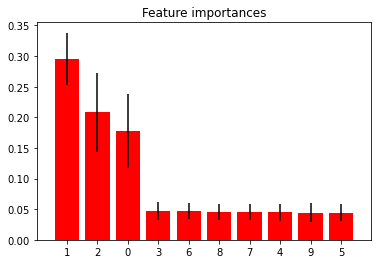

In [4]:
# 畫出森林中基於雜質的特徵重要性
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()